# **Implemantation Steps**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Step 1 : Read DataFrame**

In [2]:
df = pd.read_csv('SalaryData_Train.csv')

In [3]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(30161, 14)

## **Step 2 : Data Exploration**

In [5]:
# Get Information about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
# Check for the duplicate rows
df.duplicated().sum()

3258

In [7]:
import warnings
warnings.filterwarnings('ignore')

## **Step 3 : Data Visualization**

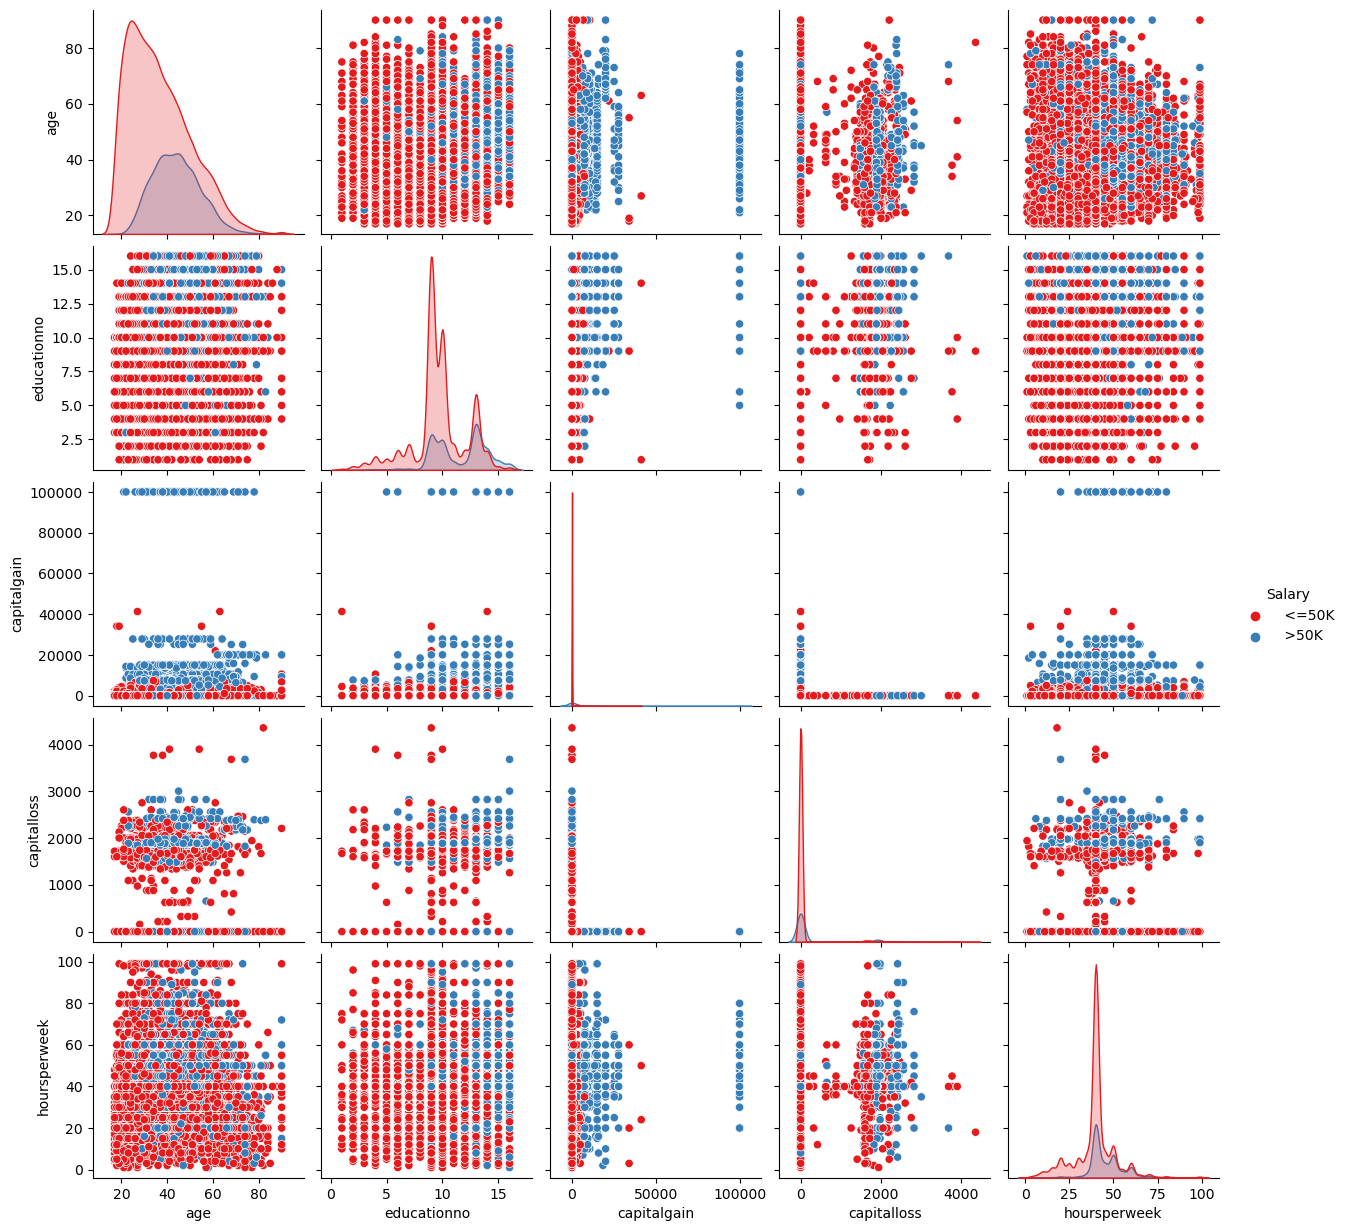

In [8]:
# Pairplot for numerical columns
sns.pairplot(data = df , hue = 'Salary' ,palette = 'Set1' , diag_kind = 'kde')

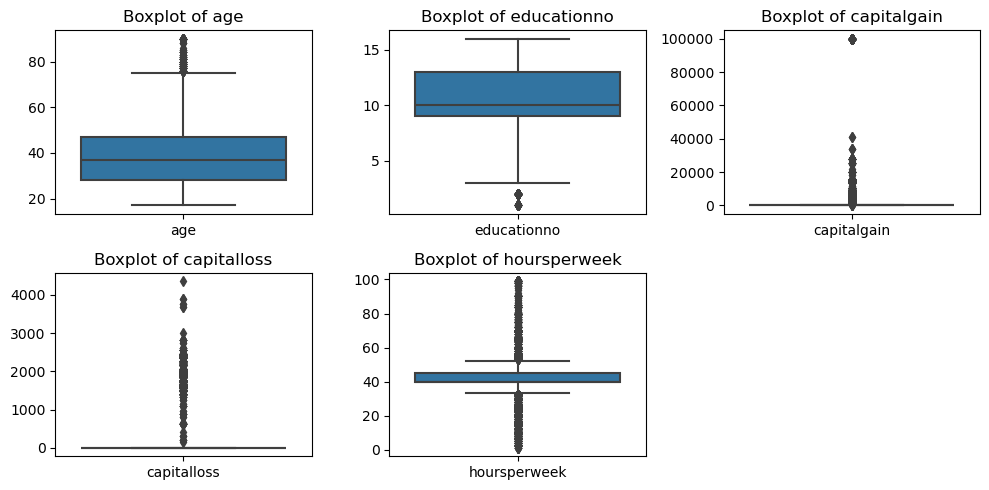

In [9]:
# Show outliers by Box Plots
numerical = df.select_dtypes(include = ['number'])
plt.figure(figsize = (10,5))
for index , col_name in enumerate(numerical):
    plt.subplot(2,3, index + 1)
    sns.boxplot(df[[col_name]])
    plt.title(f'Boxplot of {col_name}')
plt.tight_layout()
plt.show()

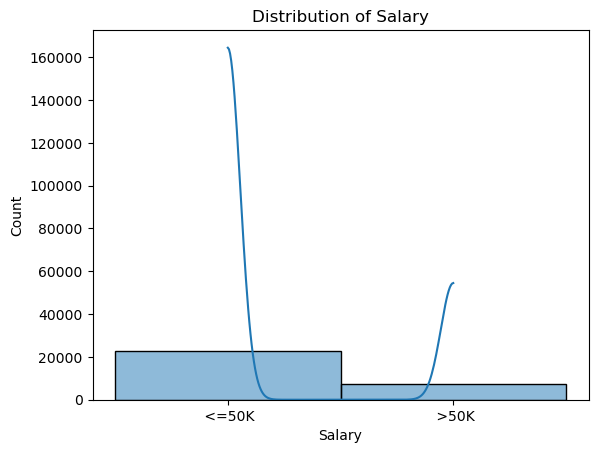

In [10]:
# Visualize the distribution of the target variable.
sns.histplot(df['Salary'], kde = True)
plt.title('Distribution of Salary')
plt.show()

In [11]:
numerical.head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [12]:
# Function to identify outliers using the IQR method
def identify_outliers( df , col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    # upper 
    upper = q3 + ( 1.5 * iqr )
    # lower
    lower = q1 - ( 1.5 * iqr )
    # extract outliers
    outliers = df.loc[(df[col] > upper) | (df[col] < lower)]
    return outliers
# Identify outliers for each numerical feature or col
dic = {}
for col in numerical:
    dic[col] = identify_outliers(numerical,col)
    
#dic

In [13]:
# Function to cap outliers using the IQR method
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

for col in numerical:
    new_data = cap_outliers(numerical, col)
new_data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39.0,13.0,0.0,0.0,40.0
1,50.0,13.0,0.0,0.0,32.5
2,38.0,9.0,0.0,0.0,40.0
3,53.0,7.0,0.0,0.0,40.0
4,28.0,13.0,0.0,0.0,40.0


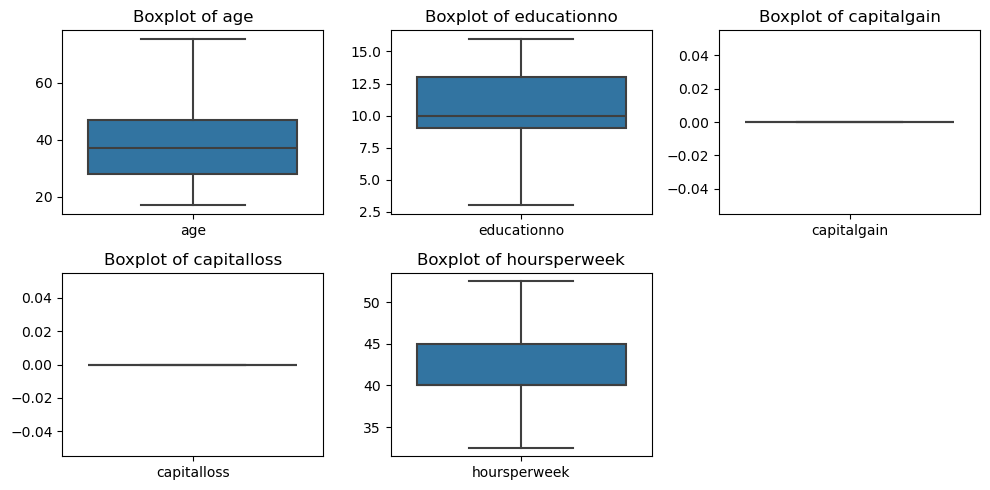

In [14]:
plt.figure(figsize = (10,5))
for index , col_name in enumerate(new_data):
    plt.subplot(2,3, index + 1)
    sns.boxplot(new_data[[col_name]])
    plt.title(f'Boxplot of {col_name}')
plt.tight_layout()
plt.show()

In [15]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
new_data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39.0,13.0,0.0,0.0,40.0
1,50.0,13.0,0.0,0.0,32.5
2,38.0,9.0,0.0,0.0,40.0
3,53.0,7.0,0.0,0.0,40.0
4,28.0,13.0,0.0,0.0,40.0


In [17]:
df.shape

(30161, 14)

In [18]:
new_data.shape

(30161, 5)

In [19]:
new_data.columns.values.tolist()

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [20]:
df.select_dtypes(include = ['number']).columns.values.tolist()

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [21]:
numerical_columns = df.select_dtypes(include = ['number']).columns.values.tolist()
for col in numerical_columns:
    df[[col]] = new_data[[col]]

In [22]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


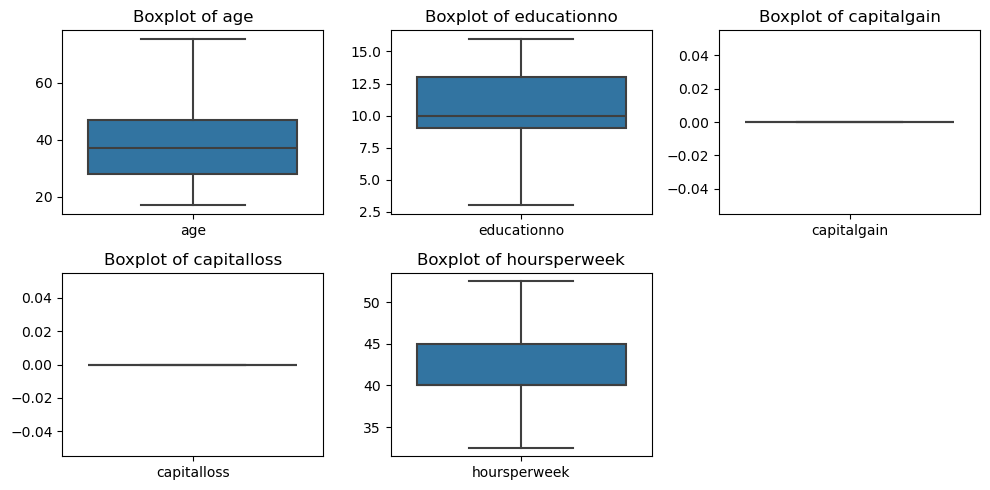

In [23]:
n = df.select_dtypes(include = ['number'])
plt.figure(figsize = (10,5))
for index , col_name in enumerate(n):
    plt.subplot(2,3, index + 1)
    sns.boxplot(df[[col_name]])
    plt.title(f'Boxplot of {col_name}')
plt.tight_layout()
plt.show()

## **Step 4 : Data Preprocessing**

In [24]:
# Drop the duplicate rows (Don't forget to reset index)
df.duplicated().sum()

4908

In [25]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True , drop = True)

In [26]:
df.duplicated().sum()

0

In [27]:
# Convert categorical columns to Numerical ('Salary', 'workclass', 'maritalstatus', 
#'occupation', 'relationship', 'race', 'sex',
#'native')
# use label encoder !
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Salary', 'workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex','hoursperweek', 'native']
for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [28]:
# Drop education column as it is a numerical representation of column educationno
df.drop(['education'],axis = 1,inplace = True)

In [29]:
df.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,5,13.0,4,0,1,4,1,0.0,0.0,8,37,0
1,50.0,4,13.0,2,3,0,4,1,0.0,0.0,0,37,0
2,38.0,2,9.0,0,5,1,4,1,0.0,0.0,8,37,0
3,53.0,2,7.0,2,5,0,2,1,0.0,0.0,8,37,0
4,28.0,2,13.0,2,9,5,2,0,0.0,0.0,8,4,0


## **Step 5 : split the dataset into features and label**

In [30]:
# x features and y label
x = df.drop(['Salary'],axis = 1)
y = df[['Salary']]

In [31]:
x.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39.0,5,13.0,4,0,1,4,1,0.0,0.0,8,37
1,50.0,4,13.0,2,3,0,4,1,0.0,0.0,0,37
2,38.0,2,9.0,0,5,1,4,1,0.0,0.0,8,37
3,53.0,2,7.0,2,5,0,2,1,0.0,0.0,8,37
4,28.0,2,13.0,2,9,5,2,0,0.0,0.0,8,4


In [32]:
y.head()

,Salary
0,0
1,0
2,0
3,0
4,0


In [33]:
# Split the data into train and test data. (with 20 % for testing size)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [34]:
x_train.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
5514,31.0,2,13.0,4,11,1,4,1,0.0,0.0,16,37
22573,33.0,2,3.0,3,2,1,4,1,0.0,0.0,8,24
20276,33.0,1,9.0,2,7,0,4,1,0.0,0.0,8,37
5214,44.0,2,5.0,0,7,3,4,0,0.0,0.0,18,37
102,38.0,2,15.0,2,9,0,4,1,0.0,0.0,8,37


In [35]:
x_test.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
9515,27.0,0,10.0,2,12,0,4,1,0.0,0.0,8,37
5345,59.0,1,5.0,2,7,0,4,1,0.0,0.0,8,37
9264,41.0,1,11.0,4,7,1,4,1,0.0,0.0,8,37
21502,23.0,2,10.0,2,6,0,0,1,0.0,0.0,0,37
18181,46.0,4,9.0,2,13,0,4,1,0.0,0.0,18,37


In [36]:
y_train.head()

,Salary
5514,0
22573,0
20276,0
5214,0
102,1


In [37]:
y_test.head()

,Salary
9515,1
5345,0
9264,0
21502,0
18181,0


## **Step 6 : Scaling**

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
# Scale the numerical features
scaler = StandardScaler()
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

In [40]:
x_train.shape

(20202, 12)

In [41]:
x_test.shape

(5051, 12)

## **Step 7 : Train SVM Model**

In [42]:
from sklearn.svm import SVC

In [43]:
sv_model = SVC()

In [44]:
sv_model.fit(x_train,y_train)

SVC()

In [45]:
y_predict = sv_model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 1, 0])

## **Step 8 : Evaluate SVM Model**

In [46]:
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
# Print the evaluation results
print(f"Accuracy: {accuracy_score(y_test, y_predict):.4f}")
print(f"Classification Report: {classification_report(y_test, y_predict)}")
print(f"Confusion Matrix:{confusion_matrix(y_test, y_predict)}")

Accuracy: 0.7802
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.98      0.87      3813
           1       0.74      0.16      0.26      1238

    accuracy                           0.78      5051
   macro avg       0.76      0.57      0.57      5051
weighted avg       0.77      0.78      0.72      5051

Confusion Matrix:[[3742   71]
 [1039  199]]


## **Step 9 : Use grid search to select the best parameters to train SVM Model**

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
params = {'kernel' : ['linear','rbf','poly'],
          'C' : [0.1, 0.01 , 0.2 , 1],
          'gamma' : [0.1,0.01,1,2],
         'degree' : [0, 1, 2, 3, 4, 5, 6]}

In [49]:
grid_search = GridSearchCV(sv_model,params)

In [ ]:
grid_search.fit(x_train,y_train)
# Waiting for more than 12 hours, which prompted me to stop it so that I could submit the assignment before the deadline
# Due to the limited capabilities of my PC and the large amount of data

In [ ]:
grid_search.best_estimator_

## **Step 10 : train SVM Model after using grid search to select the best parameters**

In [51]:
svc_after_grid = SVC(kernel = 'rbf' , C = 1 , gamma = 0.1 , degree = 2)
svc_after_grid.fit(x_train,y_train)

SVC(C=1, degree=2, gamma=0.1)

In [52]:
y_pred = svc_after_grid.predict(x_test)

## **Step 11 : Evaluate SVM Model after grid**

In [53]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.8236
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.93      0.89      3813
           1       0.69      0.51      0.58      1238

    accuracy                           0.82      5051
   macro avg       0.77      0.72      0.74      5051
weighted avg       0.81      0.82      0.81      5051

Confusion Matrix:[[3534  279]
 [ 612  626]]
